In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xgb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pointbiserialr
import math

## Preparing Data

#### Air - Sea Flux Data 

In [2]:
data = 'Climate Change Analysis/Datasets/Stage 2/Air-Sea_Flux_to_Atlantic_Cyclone.csv'
cycloneData = pd.read_csv(data)
#print(cycloneData)

In [3]:
pdi = cycloneData.PDI
#print(pdi)
#print(' ')
x = cycloneData.Year
features = ['Year', 'time']
X = cycloneData[features]
#print(X)

In [4]:
sst = cycloneData.SST
#print(sst)


#### Hurricane Data

In [5]:
data2 = 'Climate Change Analysis/Datasets/Stage 2/Atlantic_Hurricane_Data.csv'
stormData = pd.read_csv(data2)
#print(stormData)
aceYear = stormData.Year

In [6]:
namedStorms = stormData.Named_Storms
#print(namedStorms)
#print(' ')
x1 = stormData.Year
features = ['Year', 'time']
X1 = stormData[features]
#print(X1)

In [7]:
ace = stormData.ACE

## Machine Learning - Regression Model

In [8]:
emission_model = GradientBoostingRegressor(random_state=1)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

class regression:
        
    def predict(self, X, y, pred):
        emission_model.fit(X, y)
        print(X.head())
        print("Predictions: ")
        print(emission_model.predict(pred))
        train_pred = emission_model.predict(pred)
    
        #print(high_price_model.predict(108.000, 3477599.0))
        training_predictions = pd.DataFrame({'predictions': train_pred})
        #firstPred = cycloneData.join(training_predictions)
        #print(cycloneData.join(training_predictions))
        print(training_predictions)

        #print("Prediction Error: ")
        #mean_absolute_error(y, train_pred)
        
    def validate(self, X, y, mln):
        train_x, val_x, train_y, val_y = train_test_split(X, y, random_state = 0)
        validation_model = RandomForestRegressor()
        validation_model.fit(train_x, train_y)
        mean_absolute_error(val_y, validation_model.predict(val_x))
        
        fitting_model = GradientBoostingRegressor(max_leaf_nodes = mln, random_state = 0)
        fitting_model.fit(train_x, train_y) 
        mae = mean_absolute_error(val_y, fitting_model.predict(val_x))
        return(str(mae))
    
class check_Least:
    def __init__(self):
        self.least = 111111111111111111111111111111111111111111111111111110
    def iteration(self, m): 
        for x in m:
            #for i in candidate_max_leaf_nodes:
                if(x <= self.least):
                    self.least = x
                else:
                    continue
        return(m.index(self.least))
        

In [9]:
model = regression()
checkFit = check_Least()

## Graphical Relationship

In [10]:
'''# Observation of Correlation between SST and PDI
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


line1, = ax1.plot(x, pdi, label="Atlantic MDR Sea Surface Temperature (°C)", color="r")
line2, = ax2.plot(x, sst, label="Cyclone Power Dissipation (m^3 / s^2)", color="g")

curves = [line1, line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Relationship Between Atlantic Sea Surface Tempratures and Cyclone Power Dissipation Intensity')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1949', color='b')
ax1.set_ylabel('Atlantic MDR Sea Surface Temperature (°C)', color='r')
ax1.tick_params(axis='y', colors='r')
ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()'''

'# Observation of Correlation between SST and PDI\nfig, ax1 = plt.subplots()\nax2 = ax1.twinx()\n\n\nline1, = ax1.plot(x, pdi, label="Atlantic MDR Sea Surface Temperature (°C)", color="r")\nline2, = ax2.plot(x, sst, label="Cyclone Power Dissipation (m^3 / s^2)", color="g")\n\ncurves = [line1, line2]\n\nax1.legend(curves, [curve.get_label() for curve in curves])\n\nplt.title(\'Relationship Between Atlantic Sea Surface Tempratures and Cyclone Power Dissipation Intensity\')\n#plt.ylabel(\'Amount of Carbon Dioxide in ppm\')\nax1.set_xlabel(\'Years since 1949\', color=\'b\')\nax1.set_ylabel(\'Atlantic MDR Sea Surface Temperature (°C)\', color=\'r\')\nax1.tick_params(axis=\'y\', colors=\'r\')\nax2.set_ylabel(\'Power Dissipation (10^10 m^3 / s^2)\', color=\'g\')\nax2.tick_params(axis=\'y\', colors=\'g\')\nax1.grid()\n#plt.legend([\'Average Temperature Variation\', \'Carbon Emissions\'])\nplt.show()'

In [11]:
'''pdiArray = pdi.to_numpy()
sstArray = sst.to_numpy()
print(pdiArray, sstArray)
# calculate spearman's correlation
corrSpear, _ = spearmanr(pdiArray[:60], sstArray[:60])
corrKendal, _ = kendalltau(pdiArray[:60], sstArray[:60])
corrBiserial, _ = pointbiserialr(pdiArray[:60], sstArray[:60])
print('Spearman correlation (most favorable): %.3f' % corrSpear + ' *')
print('Kendal correlation: %.3f' % corrKendal)
print('Point Biserial correlation: %.3f' % corrKendal)'''

"pdiArray = pdi.to_numpy()\nsstArray = sst.to_numpy()\nprint(pdiArray, sstArray)\n# calculate spearman's correlation\ncorrSpear, _ = spearmanr(pdiArray[:60], sstArray[:60])\ncorrKendal, _ = kendalltau(pdiArray[:60], sstArray[:60])\ncorrBiserial, _ = pointbiserialr(pdiArray[:60], sstArray[:60])\nprint('Spearman correlation (most favorable): %.3f' % corrSpear + ' *')\nprint('Kendal correlation: %.3f' % corrKendal)\nprint('Point Biserial correlation: %.3f' % corrKendal)"

## Creating New Dataset Values

##### Maximum Wind Speed (Poetential Intensity) - V max

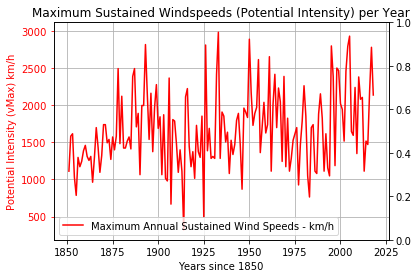

In [21]:
## ACE = Σ(n|0)(V^2 max) * 10^-4 every 6 hour intervals
## V^2 max = maximum wind speed
## V max = (ACE * 10^4)^1/2 / n

namedStormsArray = namedStorms.to_numpy()
aceArray = ace.to_numpy()
arrayLength = len(aceArray)

vMax = list()
vMaxAvg = list()
for i in range(arrayLength):
    vMax.append(math.sqrt((aceArray[i] * (10**4))))
    vMaxAvg.append(math.sqrt((aceArray[i] * (10**4)) / namedStormsArray[i]))
    
vMaxKM = list()
vMaxKMavg =  list()
for i in range(arrayLength):
    vMaxKM.append(vMax[i] * 1.852)
    vMaxKMavg.append(vMaxAvg[i] * 1.852)
    
pd.DataFrame(vMaxKM).to_csv("./PI.csv")

#print(vMax)
#print(vMaxAvg)

# Observation of Relation between CO2 entropy and PDI


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1, = ax1.plot(aceYear, vMaxKM, label="Maximum Annual Sustained Wind Speeds - km/h", color="r")
#line2, = ax2.plot(year[105:], fluxRefined[106:], label="Net Heat Flux into Ocean", color="g")
#line3, = ax2.plot(fyear[79:], forcing[79:], label="Net Radiative Forcing", color="y")
#line4, = ax2.plot(aceYear, vMaxAvg, label="Net Heat Flux into Ocean", color="y")


curves = [line1]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Maximum Sustained Windspeeds (Potential Intensity) per Year')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1850', color='k')
ax1.set_ylabel('Potential Intensity (vMax) km/h', color='r')
ax1.tick_params(axis='y', colors='r')
#ax2.set_ylabel('Climate Forcing (W/m^2)', color='g')
#ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

In [22]:
#pd.DataFrame(vMax).to_csv("./PI.csv")

##### Central Pressure in kPa

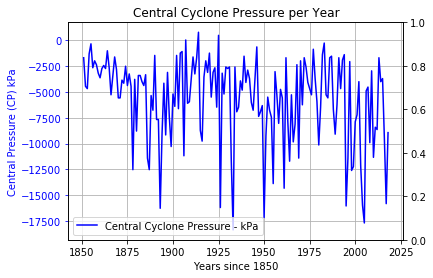

In [23]:
## Convert V max values in knots to km/h
    
#df.insert(5, "Max_Wind_Speed", vMaxKM, True)
    
## Central Hurricane Pressure
#V max (km/h) = (1010 - PO)^1/2 x ~K*
#PO = (V max / K*)^2 - 1010 / -1
#PO = central pressure; 1010 - outside pressure; K* is constant ~ 21.42

central_kPa = list()
centralAvg_kPa = list()

for m in range(arrayLength):
    central_kPa.append((((vMaxKM[m] / 21.42)**2) - 1010) / -1)
    centralAvg_kPa.append((((vMaxKMavg[m] / 21.42)**2) - 1010) / -1)
    
Stage2_data = pd.DataFrame({'Year': x1,'SST': sst, 'Potential Intensity': vMaxKM, 'Central Pressure': central_kPa})
df = pd.DataFrame(Stage2_data)   
#df.insert(6, "Central_Pressure", central_kPa, True)     
#print(central_kPa)
#rint(centralAvg_kPa)
#print(df)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1, = ax1.plot(aceYear, central_kPa, label="Central Cyclone Pressure - kPa", color="b")
#line2, = ax2.plot(year[105:], fluxRefined[106:], label="Net Heat Flux into Ocean", color="g")
#line3, = ax2.plot(fyear[79:], forcing[79:], label="Net Radiative Forcing", color="y")
#line4, = ax2.plot(aceYear, vMaxAvg, label="Net Heat Flux into Ocean", color="y")


curves = [line1]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Central Cyclone Pressure per Year')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1850', color='k')
ax1.set_ylabel('Central Pressure (CP) kPa', color='b')
ax1.tick_params(axis='y', colors='b')
#ax2.set_ylabel('Climate Forcing (W/m^2)', color='g')
#ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

##### Net Heat Flux in Watts/meters squared

In [25]:
model.predict(X[:61], sst[:61], X1)

mae_array = list()
mae = list()
for mln in [5, 25, 50, 75, 100, 150, 300, 500, 1000, 5000]:
    print("Max Leaf Nodes: " + str(mln))
    mae_array.append(model.validate(X[:61], sst[:61], mln))
    #print(mae_array)
    for i in mae_array:
        mae.append(float(i))

    #mae = mae[5:]
    #print(mae)
#print(X[:61])
#net_flux
#for i in 

   Year  time
0  1949     0
1  1950     1
2  1951     2
3  1952     3
4  1953     4
Predictions: 
[27.68458284 27.65756915 27.78279103 27.83149845 27.82726291 27.71053677
 27.79057495 27.67210686 27.7884202  27.7856302  27.68531098 27.68531098
 27.68531098 27.71023311 27.70880194 27.58699375 27.62885564 27.6780364
 27.67123603 27.67123603 27.8366621  27.70788913 27.59269919 27.59269919
 27.6116902  27.5655365  27.59135577 27.69486589 27.6365313  27.6365313
 27.74995874 27.74995874 27.71783478 27.65971822 27.65971822 27.65519021
 27.66582366 27.66582366 27.79023445 27.79023445 27.79023445 27.86565096
 27.7212184  27.75126525 27.75126525 27.75126525 27.89401594 27.88850636
 27.94180086 28.09102078 28.04407751 28.02116716 28.05451369 28.03134804
 28.13420313 28.13420313 28.13420313 28.13162565 28.02206198 28.10099345
 28.08189917 28.08189917 28.08189917 28.08189917 28.08189917 28.08189917
 28.08189917 28.08189917 28.08189917 28.08189917 28.08189917 28.08189917
 28.08189917 28.08189917 28.

C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-pa

Max Leaf Nodes: 100
Max Leaf Nodes: 150
Max Leaf Nodes: 300
Max Leaf Nodes: 500


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max Leaf Nodes: 1000
Max Leaf Nodes: 5000


[27.66922508 27.66922508 27.70586126 27.75473324 27.72767158 27.71150037
 27.71150037 27.66679353 27.66679353 27.66679353 27.60730124 27.64917494
 27.64917494 27.66968316 27.66968316 27.63512996 27.63512996 27.63512996
 27.60216122 27.60216122 27.79550835 27.6999626  27.54075252 27.54075252
 27.55457234 27.54434284 27.56236638 27.62770094 27.61847924 27.61847924
 27.71540675 27.71540675 27.69970253 27.59695588 27.59695588 27.59695588
 27.59695588 27.59695588 27.7365206  27.7365206  27.7365206  27.78046613
 27.72349701 27.72349701 27.72349701 27.72349701 27.89854806 27.85425928
 27.9301207  28.035692   27.99600354 27.9495461  27.94857552 27.89947315
 28.0763736  28.0763736  28.0763736  28.0763736  27.95091187 28.00876808
 28.01130165 28.01130165 28.01130165 28.01130165 28.01130165 28.01130165
 28.01130165 28.01130165 28.01130165 28.01130165 28.01130165 28.01130165
 28.01130165 28.01130165 28.01130165 28.01130165 28.01130165 28.01130165
 28.01130165 28.01130165 28.01130165 28.01130165 28

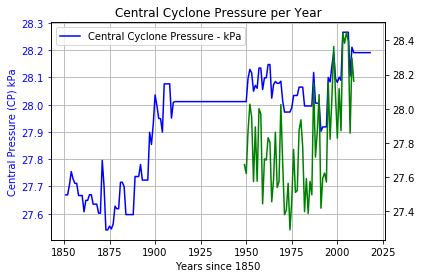

In [30]:
sstArray = sst.to_numpy()
m = list()
m = mae #mean absolute error
#print(m)

candidate_leaf_nodes = [5, 25, 50, 75, 100, 150, 300, 500, 1000, 5000]
#print(checkFit.iteration(m))
index = checkFit.iteration(m)
best_tree_size = candidate_leaf_nodes[index]
#print(" ")
#print("Max Leaf Node Size: " + str(best_tree_size))

final_model = GradientBoostingRegressor(max_leaf_nodes = 5, random_state = 0)
final_model.fit(X[:61], sst[:61])

#print(final_model.predict(X1))
valid_pred = final_model.predict(X1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1, = ax1.plot(x1, valid_pred, label="Central Cyclone Pressure - kPa", color="b")
line2, = ax2.plot(x, sstArray, label="Net Heat Flux into Ocean", color="g")
#line3, = ax2.plot(fyear[79:], forcing[79:], label="Net Radiative Forcing", color="y")
#line4, = ax2.plot(aceYear, vMaxAvg, label="Net Heat Flux into Ocean", color="y")


curves = [line1]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Central Cyclone Pressure per Year')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1850', color='k')
ax1.set_ylabel('Central Pressure (CP) kPa', color='b')
ax1.tick_params(axis='y', colors='b')
#ax2.set_ylabel('Climate Forcing (W/m^2)', color='g')
#ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

predictions = pd.DataFrame({'Year': x1,'predictions': valid_pred})
#print(predictions)

newSST = np.concatenate((valid_pred[:98], sstArray))
sstNew = np.concatenate((newSST[:159], valid_pred[159:]))
print(sstNew)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1, = ax1.plot(x1, valid_pred, label="Central Cyclone Pressure - kPa", color="b")
line2, = ax2.plot(x, sstArray, label="Net Heat Flux into Ocean", color="g")
#line3, = ax2.plot(fyear[79:], forcing[79:], label="Net Radiative Forcing", color="y")
#line4, = ax2.plot(aceYear, vMaxAvg, label="Net Heat Flux into Ocean", color="y")


curves = [line1]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Central Cyclone Pressure per Year')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1850', color='k')
ax1.set_ylabel('Central Pressure (CP) kPa', color='b')
ax1.tick_params(axis='y', colors='b')
#ax2.set_ylabel('Climate Forcing (W/m^2)', color='g')
#ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

In [ ]:
#print(cycloneData)
## Convert V max km/h to m/s
vMaxM = list()
vMaxMavg = list()
for h in range(lent):
    vMaxM.append((vMaxKM[h]*1000)/3600)
    vMaxMavg.append((vMaxKMavg[h]*1000)/3600)
    
## Outflow temperature constants according to Dr. Emanuel's reanalysis of NCEP proxy outflow temps
a = -260  # W/m^2 - constant for radiative forcing into sea
b = 10.3 # W/(m^2 * K)
c = 7.8 # (W * s)/(m^3 * K)

net_flux = list()

print(len(vMaxM))

for n in range(len(vMaxM)):
    net_flux.append(a + (b*sstNew[n]) + (c*vMaxM[n]))
    
print(net_flux)

In [21]:
pd.DataFrame(net_flux).to_csv("./flux.csv")
df.insert(4, "Net_Flux", net_flux, True)
print(df)

     Year       SST  Potential Intensity  Central Pressure     Net_Flux  \
0    1851  27.67306          1111.200000      -1681.197263  2432.593018   
1    1852  27.62029          1582.349494      -4447.150006  3453.416921   
2    1853  27.87006          1614.536169      -4671.416445  3523.532070   
3    1854  28.02661          1031.149960      -1307.419866  2260.031999   
4    1855  27.94960           785.737055       -335.598632  1728.025304   
5    1856  27.57289          1296.400000      -2653.018497  2834.295121   
6    1857  27.89352          1171.307645      -1980.219181  2563.261685   
7    1858  27.57563          1242.359368      -2353.996579  2716.746605   
8    1859  28.00031          1385.909896      -3176.306854  3027.772748   
9    1860  27.96931          1458.266258      -3624.839731  3184.544866   
10   1861  27.44340          1309.561759      -2727.773977  2861.739013   
11   1862  27.70610          1256.087513      -2428.752059  2746.309446   
12   1863  27.69907      

In [20]:
pd.DataFrame(sstNew).to_csv("./sstNew.csv")

In [ ]:
'''import firebase_admin
import google.cloud
from firebase_admin import credentials, firestore

cred = credentials.Certificate("./ServiceAccountKey.json")
app = firebase_admin.initialize_app(cred)

store = firestore.client()
doc_ref = store.collection(u'users').limit(2)

try:
    docs = doc_ref.get()
    for doc in docs:
        print(u'Doc Data:{}'.format(doc.to_dict()))
except google.cloud.exceptions.NotFound:
    print(u'Missing data')

In [ ]:
'''import firebase_admin
import google.cloud
from firebase_admin import credentials, firestore

cred = credentials.Certificate("./ServiceAccountKey.json")
app = firebase_admin.initialize_app(cred)

store = firestore.client()

doc_ref = store.collection(u'test')
doc_ref.add({u'name': u'test', u'added': u'just now'})